# Player evaluation

Here we compare players based on their adjusted points. Also, we calculate some useful metrics using the adjusted points to further evaluate player performance in FPL.

In [1]:
# recent gameweek
gameweek = 21

In [2]:
# import basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

pd.set_option('max_columns',100)

In [3]:
# fetch FPL data
filepath = '../data/fpl/data_week' + str(gameweek) + '.csv'
df = pd.read_csv(filepath, index_col=0)

# fetch team data
filepath = '../data/fbref/team_stats_week' + str(gameweek) + '.csv'
teamStats = pd.read_csv(filepath, index_col=0)

# fetch player stats data
filepath = '../data/fbref/player_stats_week' + str(gameweek) + '.csv'
playerStats = pd.read_csv(filepath, index_col=0, skiprows=1)

## Value and value points

Here we calculate two interesting metrics: 'value' and 'value points'. 

Value is simply adjusted points per game divided by the cost of the player. Essentially, this measures how many 'points per pound(/euro/whatever)' has the player gained on an average game week. 

The value points is calculated as the geometric mean of a players adjusted points per game and value. Essentially, in FPL we want to gain the maximum possible amount of points. However, we are restrained by a limited budget, so that in practice we cannot just pick all the best players. Then, we would like to have a squad of players that give the most points given our budget. Thus, we would like to pick players that have high value ('bang for buck'). However, often the players with highest value are very cheap players who somewhat overperform relative to their price. Picking a squad full of these players might leave a part of our budget unused. Calculating the geometric mean of adjusted points and value allows us to weigh both aspects equally, i.e. we want players that both gain a lot of points but also have good value. For example, this metric values equally two players, where one has twice the points per game of the other who in turn has twice the value of the other.

In [4]:
# value = expected points / cost
df['value'] = df['adjusted points per game'] / (df['now_cost'] / 10.0)
df['value form 5'] = df['form 5'] / (df['now_cost'] / 10.0)
df['value form 10'] = df['form 10'] / (df['now_cost'] / 10.0)
# geometric mean of 'adjusted points per game' and 'value'
df['valuePoints metric'] = np.sqrt(df['adjusted points per game'] * df['value'])

In [5]:
df['xG+xA'] = df['xG'] + df['xA']
df['xG+xA per game'] = df['xG+xA'] / df['games played']

In [6]:
goalkeepers = df['element_type'] == 1
defenders = df['element_type'] == 2
midfielders = df['element_type'] == 3
forwards = df['element_type'] == 4

minGames = df['games played'] >= 2

## Player evaluation

Below we compile lists for each position sorting players based on a given metric.

Notice that 'next1_xP' is currently based on preseason expectations on average player performance!

In [7]:
metric = 'valuePoints metric'
#metric = 'adjusted points per game'
#metric = 'next1_xP'

numberToShow = 40

print('GOALKEEPERS')
display(df[goalkeepers & minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 5',\
                                                  'next5_xP', 'valuePoints metric']].head(20))
print('DEFENDERS')
display(df[defenders & minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 5',\
                                                  'next5_xP','valuePoints metric']].head(numberToShow))
print('MIDFIELDERS')
display(df[midfielders & minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 5',\
                                                  'next5_xP','valuePoints metric']].head(numberToShow))
print('FORWARDS')
display(df[forwards & minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 5',\
                                                  'next5_xP','valuePoints metric']].head(numberToShow))

GOALKEEPERS


,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 5,next5_xP,valuePoints metric
id,,,,,,,,,,,
96,Pope,Burnley,54,18.846154,98,87.504895,5.2,4.643117,4.368964,4.783579,1.998079
12,Martínez,Aston Villa,51,19.074074,103,84.613198,5.4,4.436032,3.878302,4.329937,1.964308
597,Sánchez,Brighton,44,10.000000,40,37.635668,4.0,3.763567,4.218416,3.888857,1.794210
431,Fabianski,West Ham,51,20.250000,81,81.984576,4.0,4.048621,2.703498,3.952687,1.792760
383,Lloris,Tottenham,56,19.761905,83,83.656744,4.2,4.233233,3.834448,4.323015,1.788867
8,Leno,Arsenal,50,21.190476,89,83.395130,4.2,3.935501,4.461447,3.723583,1.760009
516,Areola,Fulham,45,19.166667,69,70.627621,3.6,3.684919,3.825605,3.877439,1.737088
363,McCarthy,Southampton,46,19.000000,76,70.437493,4.0,3.707236,2.819096,3.760229,1.728508
252,Alisson,Liverpool,59,18.205128,71,74.782501,3.9,4.107771,4.468545,4.089447,1.691143


DEFENDERS


,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 5,next5_xP,valuePoints metric
id,,,,,,,,,,,
39,Hause,Aston Villa,44,4.000000,28,21.006651,7.0,5.251663,NaN,5.092648,2.503632
273,Stones,Manchester City,52,11.000000,77,57.493012,7.0,5.226637,5.445642,5.092249,2.292032
277,Cancelo,Manchester City,60,15.087719,86,82.050783,5.7,5.438250,5.785390,5.284572,2.220156
5,Cédric,Arsenal,46,4.000000,20,17.860721,5.0,4.465180,5.683250,4.192270,2.081901
75,Bernardo,Brighton,39,2.941176,5,11.410490,1.7,3.879567,2.268822,4.054392,1.964495
556,Dias,Manchester City,60,17.843137,91,85.731106,5.1,4.804710,6.266408,4.677255,1.961515
576,Dawson,West Ham,45,6.000000,36,24.802837,6.0,4.133806,4.766669,3.958350,1.948695
109,Rüdiger,Chelsea,45,6.000000,30,23.945419,5.0,3.990903,4.391866,4.161218,1.881330
283,Zinchenko,Manchester City,55,7.000000,35,30.459190,5.0,4.351313,4.800522,4.251509,1.855406


MIDFIELDERS


,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 5,next5_xP,valuePoints metric
id,,,,,,,,,,,
272,De Bruyne,Manchester City,118,16.964286,95,117.336593,5.6,6.916683,7.178408,6.581042,2.013524
24,Saka,Arsenal,54,18.000000,81,83.140067,4.5,4.618893,7.319739,4.412753,1.987655
37,Grealish,Aston Villa,77,18.888889,119,103.063262,6.3,5.456290,5.137836,5.356977,1.966311
271,Gündogan,Manchester City,58,15.090909,83,69.820083,5.5,4.626632,5.855828,4.466700,1.921104
302,Fernandes,Manchester Utd,114,21.014493,145,135.561677,6.9,6.450866,5.289524,6.652619,1.910582
23,Smith Rowe,Arsenal,44,6.956522,32,27.379362,4.6,3.935783,4.211512,3.792788,1.876311
203,Harrison,Leeds United,54,18.888889,85,81.451041,4.5,4.312114,4.260743,4.282098,1.855638
390,Son,Tottenham,98,19.861111,143,114.564748,7.2,5.768295,5.281218,5.740575,1.842614
449,Soucek,West Ham,53,21.086957,97,86.882574,4.6,4.120205,4.581667,3.980992,1.789702


FORWARDS


,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 5,next5_xP,valuePoints metric
id,,,,,,,,,,,
202,Bamford,Leeds United,66,19.833333,119,112.467887,6.0,5.670650,4.814135,5.583835,2.207297
506,Wilson,Newcastle Utd,67,18.965517,110,98.271348,5.8,5.181580,3.983124,5.045991,2.001819
514,Watkins,Aston Villa,63,18.888889,85,92.353078,4.5,4.889281,4.140000,4.806471,1.947936
388,Kane,Tottenham,111,19.066667,143,123.120966,7.5,6.457393,6.816930,6.399062,1.938187
224,Vardy,Leicester City,100,18.125000,116,108.766157,6.4,6.000891,4.922573,5.776037,1.897648
68,Maupay,Brighton,61,18.947368,72,81.658270,3.8,4.309742,4.860000,4.437192,1.744964
437,Antonio,West Ham,65,13.095238,55,58.078270,4.2,4.435068,5.739748,4.265036,1.739577
588,Welbeck,Brighton,55,9.000000,36,35.556539,4.0,3.950727,NaN,4.030317,1.684595
164,Calvert-Lewin,Everton,76,18.000000,99,83.313078,5.5,4.628504,2.600000,4.677612,1.678935


Below we compile a list sorting players based on a given metric (irrespective of position).

In [8]:
metric = 'adjusted points per game'

display(df.sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game','next5_xP',\
                                                  'valuePoints metric']].head(numberToShow))

,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,next5_xP,valuePoints metric
id,,,,,,,,,,
272,De Bruyne,Manchester City,118,16.964286,95,117.336593,5.6,6.916683,6.581042,2.013524
388,Kane,Tottenham,111,19.066667,143,123.120966,7.5,6.457393,6.399062,1.938187
302,Fernandes,Manchester Utd,114,21.014493,145,135.561677,6.9,6.450866,6.652619,1.910582
254,Salah,Liverpool,126,20.000000,146,125.844892,7.3,6.292245,5.858024,1.772639
224,Vardy,Leicester City,100,18.125000,116,108.766157,6.4,6.000891,5.776037,1.897648
390,Son,Tottenham,98,19.861111,143,114.564748,7.2,5.768295,5.740575,1.842614
251,Mané,Liverpool,119,19.074074,103,109.577302,5.4,5.744829,5.337864,1.665343
202,Bamford,Leeds United,66,19.833333,119,112.467887,6.0,5.670650,5.583835,2.207297
37,Grealish,Aston Villa,77,18.888889,119,103.063262,6.3,5.456290,5.356977,1.966311


In [9]:
metric = 'valuePoints metric'

display(df[minGames & midfielders & (df['now_cost']<63)].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','points_per_game','adjusted points per game','form 5','next1_xP','next5_xP',\
                                                  'valuePoints metric']].head(numberToShow))

,web_name,team_name,now_cost,games played,points_per_game,adjusted points per game,form 5,next1_xP,next5_xP,valuePoints metric
id,,,,,,,,,,
24,Saka,Arsenal,54,18.000000,4.5,4.618893,7.319739,4.388260,4.412753,1.987655
271,Gündogan,Manchester City,58,15.090909,5.5,4.626632,5.855828,4.832923,4.466700,1.921104
23,Smith Rowe,Arsenal,44,6.956522,4.6,3.935783,4.211512,3.833539,3.792788,1.876311
203,Harrison,Leeds United,54,18.888889,4.5,4.312114,4.260743,4.408752,4.282098,1.855638
449,Soucek,West Ham,53,21.086957,4.6,4.120205,4.581667,3.883606,3.980992,1.789702
105,Jorginho,Chelsea,47,13.157895,3.8,3.819089,2.880622,3.498026,3.821448,1.761615
40,Trézéguet,Aston Villa,52,10.800000,2.5,3.986367,1.500000,3.918870,3.901974,1.748137
33,Hourihane,Aston Villa,59,4.000000,5.0,4.219983,NaN,4.178609,4.153664,1.737340
69,Trossard,Brighton,57,17.894737,3.8,4.052211,5.211691,3.617956,4.161218,1.697284


In [10]:
metric = 'form 5'

display(df.sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 5',\
                                                        'next5_xP','valuePoints metric']].head(numberToShow))

,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 5,next5_xP,valuePoints metric
id,,,,,,,,,,,
104,Alonso,Chelsea,56,4.000000,16,13.930279,4.0,3.482570,9.500000,3.644303,1.471654
17,Tierney,Arsenal,53,17.105263,65,61.963076,3.8,3.622457,8.456136,3.363471,1.573495
139,van Aanholt,Crystal Palace,54,10.800000,27,36.318289,2.5,3.362805,7.981280,3.551049,1.447121
24,Saka,Arsenal,54,18.000000,81,83.140067,4.5,4.618893,7.319739,4.412753,1.987655
542,Reguilón,Tottenham,56,12.926829,53,50.563493,4.1,3.911515,7.273494,3.988257,1.652917
272,De Bruyne,Manchester City,118,16.964286,95,117.336593,5.6,6.916683,7.178408,6.581042,2.013524
4,Aubameyang,Arsenal,113,16.904762,71,76.162467,4.2,4.505385,7.093006,4.288745,1.340271
388,Kane,Tottenham,111,19.066667,143,123.120966,7.5,6.457393,6.816930,6.399062,1.938187
568,Telles,Manchester Utd,55,7.096774,22,24.641698,3.1,3.472239,6.703519,3.813925,1.480568


In [11]:
metric = 'next1_xP'

display(df.sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game',metric,\
                                                  'valuePoints metric']].head(numberToShow))

,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,next1_xP,valuePoints metric
id,,,,,,,,,,
272,De Bruyne,Manchester City,118,16.964286,95,117.336593,5.6,6.916683,7.216380,2.013524
302,Fernandes,Manchester Utd,114,21.014493,145,135.561677,6.9,6.450866,6.539937,1.910582
224,Vardy,Leicester City,100,18.125000,116,108.766157,6.4,6.000891,6.091691,1.897648
277,Cancelo,Manchester City,60,15.087719,86,82.050783,5.7,5.438250,6.005032,2.220156
388,Kane,Tottenham,111,19.066667,143,123.120966,7.5,6.457393,5.965480,1.938187
254,Salah,Liverpool,126,20.000000,146,125.844892,7.3,6.292245,5.906496,1.772639
273,Stones,Manchester City,52,11.000000,77,57.493012,7.0,5.226637,5.783166,2.292032
202,Bamford,Leeds United,66,19.833333,119,112.467887,6.0,5.670650,5.743068,2.207297
506,Wilson,Newcastle Utd,67,18.965517,110,98.271348,5.8,5.181580,5.408911,2.001819


In [12]:
metric = 'xG'

display(df.sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','points_per_game','adjusted points per game','next1_xP',\
                      'valuePoints metric', 'xG', 'xA', 'xG+xA', 'xG+xA per game']].head(numberToShow))

,web_name,team_name,now_cost,games played,points_per_game,adjusted points per game,next1_xP,valuePoints metric,xG,xA,xG+xA,xG+xA per game
id,,,,,,,,,,,,
224,Vardy,Leicester City,100,18.125000,6.4,6.000891,6.091691,1.897648,12.4,2.5,14.9,0.822069
202,Bamford,Leeds United,66,19.833333,6.0,5.670650,5.743068,2.207297,11.4,2.4,13.8,0.695798
254,Salah,Liverpool,126,20.000000,7.3,6.292245,5.906496,1.772639,10.8,3.4,14.2,0.710000
514,Watkins,Aston Villa,63,18.888889,4.5,4.889281,4.769593,1.947936,10.7,2.0,12.7,0.672353
388,Kane,Tottenham,111,19.066667,7.5,6.457393,5.965480,1.938187,9.7,4.7,14.4,0.755245
68,Maupay,Brighton,61,18.947368,3.8,4.309742,3.857446,1.744964,9.3,1.5,10.8,0.570000
302,Fernandes,Manchester Utd,114,21.014493,6.9,6.450866,6.539937,1.910582,9.3,7.4,16.7,0.794690
506,Wilson,Newcastle Utd,67,18.965517,5.8,5.181580,5.408911,2.001819,9.0,1.6,10.6,0.558909
251,Mané,Liverpool,119,19.074074,5.4,5.744829,5.384222,1.665343,9.0,3.4,12.4,0.650097


## Player Visualizations

In [13]:
game_weeks = np.arange(1,gameweek+1)
column_xPoints = []
column_xG = []
column_xA = []
column_xGA = []
for i in range(1,gameweek+1):
    column_xPoints.append('xPoints week ' + str(i))
    column_xG.append('xG_week' + str(i))
    column_xA.append('xA_week' + str(i))
    column_xGA.append('xGA_week' + str(i))

#display(game_weeks)
#display(column_xPoints)

,adjusted points,adjusted points per game,assists,assists_week1,assists_week10,assists_week11,assists_week12,assists_week13,assists_week14,assists_week15,assists_week16,assists_week17,assists_week18,assists_week19,assists_week2,assists_week20,assists_week21,assists_week3,assists_week4,assists_week5,assists_week6,assists_week7,assists_week8,assists_week9,bonus,bps,chance_of_playing_next_round,chance_of_playing_this_round,clean_sheet_points,clean_sheets,cleansheet_week1,cleansheet_week10,cleansheet_week11,cleansheet_week12,cleansheet_week13,cleansheet_week14,cleansheet_week15,cleansheet_week16,cleansheet_week17,cleansheet_week18,cleansheet_week19,cleansheet_week2,cleansheet_week20,cleansheet_week21,cleansheet_week3,cleansheet_week4,cleansheet_week5,cleansheet_week6,cleansheet_week7,cleansheet_week8,...,xGA_week5,xGA_week6,xGA_week7,xGA_week8,xGA_week9,xG_points,xG_week1,xG_week10,xG_week11,xG_week12,xG_week13,xG_week14,xG_week15,xG_week16,xG_week17,xG_week18,xG_week19,xG_week2,xG_week20,xG_week21,xG_week3,xG_week4,xG_week5,xG_week6,xG_week7,xG_week8,xG_week9,xPoints,xPoints week 1,xPoints week 10,xPoints week 11,xPoints week 12,xPoints week 13,xPoints week 14,xPoints week 15,xPoints week 16,xPoints week 17,xPoints week 18,xPoints week 19,xPoints week 2,xPoints week 20,xPoints week 21,xPoints week 3,xPoints week 4,xPoints week 5,xPoints week 6,xPoints week 7,xPoints week 8,xPoints week 9,yellow_cards
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
612,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
251,109.577302,5.744829,7,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,0.0,0.0,2.0,NaN,0.0,NaN,0.0,2.0,0.0,1.0,0.0,8,297,75.0,100.0,6.229415,5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.3,1.5,0.4,1.6,1.3,45.0,0.2,0.0,0.5,0.2,0.1,0.4,0.8,0.1,0.2,NaN,0.2,0.9,1.2,NaN,1.6,NaN,0.9,0.5,0.2,0.0,1.0,NaN,5.948812,1.000000,6.129499,3.182684,3.072532,4.302809,8.97032,3.17032,4.148812,NaN,6.600259,10.167879,14.716215,NaN,10.601194,NaN,6.672532,7.960167,3.67032,3.658834,7.272532,2
332,19.239012,2.425789,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0,107,100.0,100.0,7.639012,3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.7,0.7,1.2,1.0,1.5,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,3.471518,2.631484,3.504777,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.040207,1.730734,NaN,3.471518,2.362872,1.0,NaN,NaN,NaN,NaN,1.892521,1


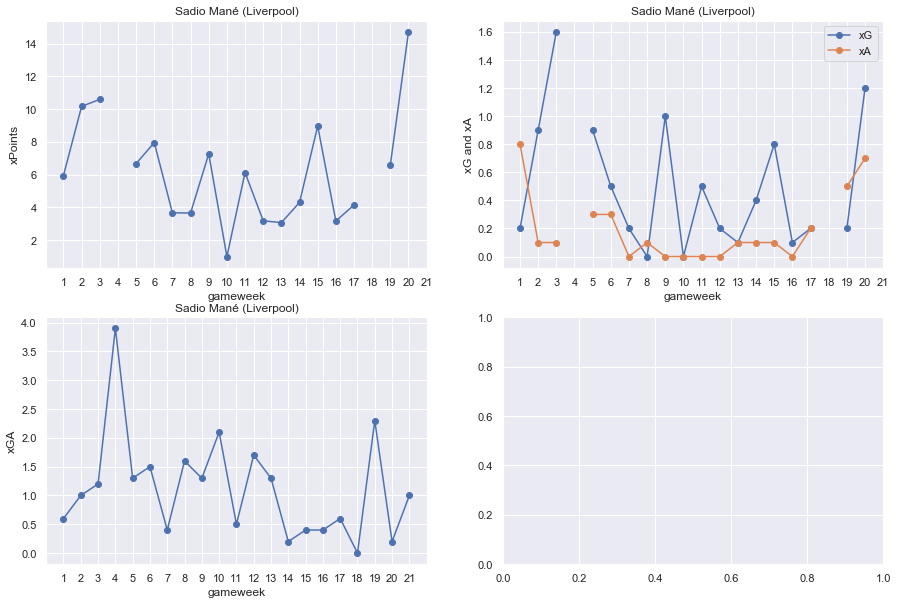

In [23]:
# find player index
name_string = 'Man'
playersFound = df[df['web_name'].str.contains(name_string)]
display(playersFound)
# plot xPoints over time
#ix = playersFound.index[0]
ix = 251

fig,ax = plt.subplots(2,2,figsize=(15,10))

ax[0,0].plot(game_weeks, df.loc[ix,column_xPoints], marker='o')
title_string = df.loc[ix,'first_name'] + ' ' + df.loc[ix,'second_name'] + ' (' + df.loc[ix,'team_name'] + ')'
ax[0,0].set_title(title_string)
ax[0,0].set_xlabel('gameweek')
ax[0,0].set_ylabel('xPoints')
ax[0,0].set_xticks(game_weeks)

ax[0,1].plot(game_weeks, df.loc[ix,column_xG], marker='o')
ax[0,1].plot(game_weeks, df.loc[ix,column_xA], marker='o')
ax[0,1].legend(('xG','xA'))
title_string = df.loc[ix,'first_name'] + ' ' + df.loc[ix,'second_name'] + ' (' + df.loc[ix,'team_name'] + ')'
ax[0,1].set_title(title_string)
ax[0,1].set_xlabel('gameweek')
ax[0,1].set_ylabel('xG and xA')
ax[0,1].set_xticks(game_weeks)

ax[1,0].plot(game_weeks, df.loc[ix,column_xGA], marker='o')
title_string = df.loc[ix,'first_name'] + ' ' + df.loc[ix,'second_name'] + ' (' + df.loc[ix,'team_name'] + ')'
ax[1,0].set_title(title_string)
ax[1,0].set_xlabel('gameweek')
ax[1,0].set_ylabel('xGA')
ax[1,0].set_xticks(game_weeks)

plt.show()

## My team

In [20]:
# find player index
df[df['web_name'].str.contains('Man')]

,adjusted points,adjusted points per game,assists,assists_week1,assists_week10,assists_week11,assists_week12,assists_week13,assists_week14,assists_week15,assists_week16,assists_week17,assists_week18,assists_week19,assists_week2,assists_week20,assists_week21,assists_week3,assists_week4,assists_week5,assists_week6,assists_week7,assists_week8,assists_week9,bonus,bps,chance_of_playing_next_round,chance_of_playing_this_round,clean_sheet_points,clean_sheets,cleansheet_week1,cleansheet_week10,cleansheet_week11,cleansheet_week12,cleansheet_week13,cleansheet_week14,cleansheet_week15,cleansheet_week16,cleansheet_week17,cleansheet_week18,cleansheet_week19,cleansheet_week2,cleansheet_week20,cleansheet_week21,cleansheet_week3,cleansheet_week4,cleansheet_week5,cleansheet_week6,cleansheet_week7,cleansheet_week8,...,xGA_week5,xGA_week6,xGA_week7,xGA_week8,xGA_week9,xG_points,xG_week1,xG_week10,xG_week11,xG_week12,xG_week13,xG_week14,xG_week15,xG_week16,xG_week17,xG_week18,xG_week19,xG_week2,xG_week20,xG_week21,xG_week3,xG_week4,xG_week5,xG_week6,xG_week7,xG_week8,xG_week9,xPoints,xPoints week 1,xPoints week 10,xPoints week 11,xPoints week 12,xPoints week 13,xPoints week 14,xPoints week 15,xPoints week 16,xPoints week 17,xPoints week 18,xPoints week 19,xPoints week 2,xPoints week 20,xPoints week 21,xPoints week 3,xPoints week 4,xPoints week 5,xPoints week 6,xPoints week 7,xPoints week 8,xPoints week 9,yellow_cards
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
612,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
251,109.577302,5.744829,7,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,0.0,0.0,2.0,NaN,0.0,NaN,0.0,2.0,0.0,1.0,0.0,8,297,75.0,100.0,6.229415,5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.3,1.5,0.4,1.6,1.3,45.0,0.2,0.0,0.5,0.2,0.1,0.4,0.8,0.1,0.2,NaN,0.2,0.9,1.2,NaN,1.6,NaN,0.9,0.5,0.2,0.0,1.0,NaN,5.948812,1.000000,6.129499,3.182684,3.072532,4.302809,8.97032,3.17032,4.148812,NaN,6.600259,10.167879,14.716215,NaN,10.601194,NaN,6.672532,7.960167,3.67032,3.658834,7.272532,2
332,19.239012,2.425789,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0,107,100.0,100.0,7.639012,3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.7,0.7,1.2,1.0,1.5,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,3.471518,2.631484,3.504777,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.040207,1.730734,NaN,3.471518,2.362872,1.0,NaN,NaN,NaN,NaN,1.892521,1


In [24]:
my_starting11 = [12,232,558,277,271,302,37,251,506,202,388]
my_subs = [213,141,200,146]

In [25]:
print('STARTING 11')
display(df.loc[my_starting11, ['web_name','team_name','now_cost',\
          'games played','points_per_game','adjusted points per game','form 5','form 10','next1_xP','next5_xP',\
                                                  'valuePoints metric']].head(numberToShow))
print('\nSUBSTITUTES')
display(df.loc[my_subs, ['web_name','team_name','now_cost',\
          'games played','points_per_game','adjusted points per game','form 5','form 10','next1_xP','next5_xP',\
                                                  'valuePoints metric']].head(numberToShow))

STARTING 11


,web_name,team_name,now_cost,games played,points_per_game,adjusted points per game,form 5,form 10,next1_xP,next5_xP,valuePoints metric
id,,,,,,,,,,,
12,Martínez,Aston Villa,51,19.074074,5.4,4.436032,3.878302,5.148032,4.500606,4.329937,1.964308
232,Chilwell,Chelsea,61,17.000000,5.0,4.223045,2.373951,3.028173,3.978553,4.382332,1.709861
558,Coufal,West Ham,47,16.923077,3.9,3.982306,4.145731,4.063764,3.485376,3.839382,1.836901
277,Cancelo,Manchester City,60,15.087719,5.7,5.438250,5.785390,5.563256,6.005032,5.284572,2.220156
271,Gündogan,Manchester City,58,15.090909,5.5,4.626632,5.855828,6.094741,4.832923,4.466700,1.921104
302,Fernandes,Manchester Utd,114,21.014493,6.9,6.450866,5.289524,6.142574,6.539937,6.652619,1.910582
37,Grealish,Aston Villa,77,18.888889,6.3,5.456290,5.137836,4.941700,5.367228,5.356977,1.966311
251,Mané,Liverpool,119,19.074074,5.4,5.744829,6.366321,5.351550,5.384222,5.337864,1.665343
506,Wilson,Newcastle Utd,67,18.965517,5.8,5.181580,3.983124,4.110516,5.408911,5.045991,2.001819



SUBSTITUTES


,web_name,team_name,now_cost,games played,points_per_game,adjusted points per game,form 5,form 10,next1_xP,next5_xP,valuePoints metric
id,,,,,,,,,,,
213,Meslier,Leeds United,47,18.780488,4.1,3.502562,3.661832,3.896405,3.698872,3.610557,1.615611
141,Zaha,Crystal Palace,72,18.035714,5.6,4.726803,3.366864,3.191253,4.826096,4.921709,1.761575
200,Dallas,Leeds United,48,20.000000,4.1,2.992337,3.217971,3.579616,3.211268,3.073214,1.365809
146,Mitchell,Crystal Palace,39,11.034483,2.9,2.771133,3.740015,3.511667,3.181745,2.920130,1.403217


## Save data

In [18]:
# save data
filepath = '../data/fpl/data_week' + str(gameweek) + str('.csv')
df.to_csv(filepath)